## Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
# Loading the data from csv
car_data = pd.read_csv('car data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_data["Fuel_Type"].value_counts(), car_data["Seller_Type"].value_counts(), car_data["Transmission"].value_counts()

(Fuel_Type
 Petrol    239
 Diesel     60
 CNG         2
 Name: count, dtype: int64,
 Seller_Type
 Dealer        195
 Individual    106
 Name: count, dtype: int64,
 Transmission
 Manual       261
 Automatic     40
 Name: count, dtype: int64)

In [28]:
# Enconding "Fuel_Type" Column
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Enconding Seller_Type
car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Enconding Transmission
car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

C:\Users\malub\AppData\Local\Temp\ipykernel_15460\3781851799.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)


In [29]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Spliting the data into Training data and Test data

In [30]:
X = car_data.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
car_data['Fuel_Type'].unique()

array([0, 1, 2])

## Model Training
1. Linear Regression

In [33]:
lin_reg_model = LinearRegression()

In [34]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [35]:
training_data_prediction = lin_reg_model.predict(X_train)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
error_score

0.8838169193709794

## Visualize the actual prices and Predicted prices

Text(0.5, 1.0, 'Actual vs Predicted Prices')

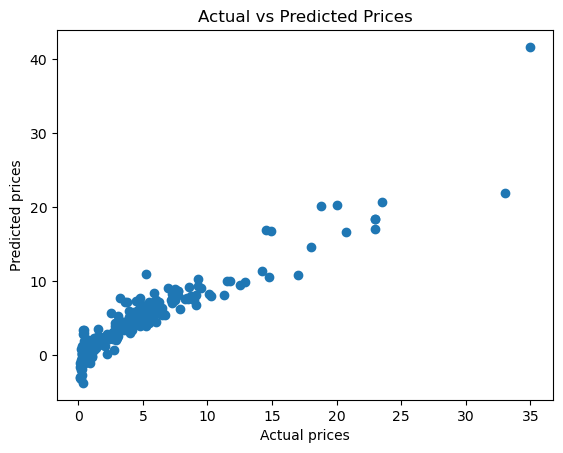

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')

In [41]:
test_data_prediction = lin_reg_model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Prices')

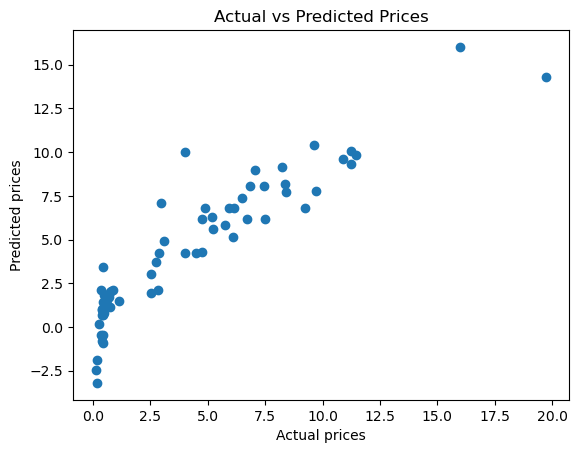

In [42]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')

## Lasso Regression

In [43]:
lass_reg_model = Lasso()

In [45]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [46]:
training_data_prediction = lass_reg_model.predict(X_train)

In [47]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
error_score

0.8435873952582833

Text(0.5, 1.0, 'Actual vs Predicted Prices')

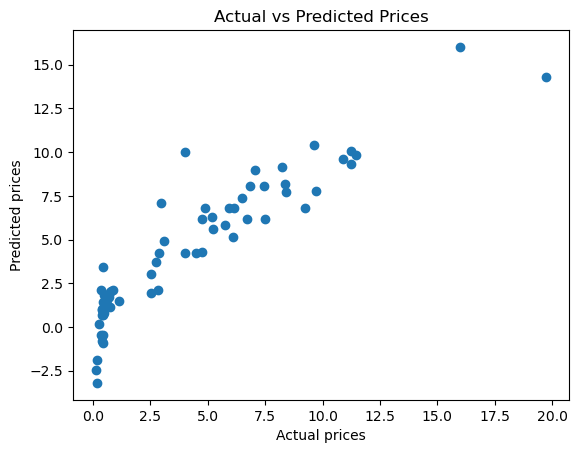

In [48]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')